In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# load saved pkl from last notebook

users_data = pd.read_pickle("../data/users_data_cleaned_and_encoded.pkl")

users_data.head(n = 10)

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,...,education_primary,education_secondary,education_tertiary,contact_cellular,contact_not contacted,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.000000,2143.000000,58,False,True,False,261,1,-1,0,...,0,0,1,0,1,0,0,0,1,0
1,3.977407,1369.845345,44,False,True,False,151,1,-1,0,...,0,1,0,0,1,0,0,1,0,0
2,2.000000,2.000000,33,False,True,True,76,1,-1,0,...,0,1,0,0,1,0,0,0,1,0
3,3.977407,1369.845345,47,False,True,False,92,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
4,1.000000,1.000000,33,False,False,False,198,1,-1,0,...,0,0,0,0,1,0,0,0,1,0
5,2.000000,231.000000,35,False,True,False,139,1,-1,0,...,0,0,1,0,1,0,0,1,0,0
6,2.000000,447.000000,28,False,True,True,217,1,-1,0,...,0,0,1,0,1,0,0,0,1,0
7,1.000000,2.000000,42,True,True,False,380,1,-1,0,...,0,0,1,0,1,0,0,0,1,0
8,3.977407,1369.845345,58,False,True,False,50,1,-1,0,...,1,0,0,0,1,0,0,1,0,0
9,2.000000,593.000000,43,False,True,False,55,1,-1,0,...,0,1,0,0,1,0,0,0,1,0


In [4]:
users_data.shape

(45179, 25)

In [5]:
# check that we have no null values

users_data.isnull().sum()

number_transactions      0
total_amount_usd         0
age                      0
default                  0
housing                  0
loan                     0
duration                 0
campaign                 0
pdays                    0
previous                 0
term_deposit             0
marital_divorced         0
marital_married          0
marital_single           0
education_Unknown        0
education_primary        0
education_secondary      0
education_tertiary       0
contact_cellular         0
contact_not contacted    0
contact_telephone        0
device_Unknown           0
device_desktop           0
device_mobile            0
device_tablet            0
dtype: int64

In [6]:
# check that there is no non numerical type data

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_transactions    45179 non-null  float64
 1   total_amount_usd       45179 non-null  float64
 2   age                    45179 non-null  int64  
 3   default                45179 non-null  bool   
 4   housing                45179 non-null  bool   
 5   loan                   45179 non-null  bool   
 6   duration               45179 non-null  int64  
 7   campaign               45179 non-null  int64  
 8   pdays                  45179 non-null  int64  
 9   previous               45179 non-null  int64  
 10  term_deposit           45179 non-null  bool   
 11  marital_divorced       45179 non-null  uint8  
 12  marital_married        45179 non-null  uint8  
 13  marital_single         45179 non-null  uint8  
 14  education_Unknown      45179 non-null  uint8  
 15  ed

In [7]:
# define our features and targets

target = users_data['total_amount_usd']
features = users_data.drop(['total_amount_usd'], axis = 1)

In [8]:
# target should have no columns

target.shape

(45179,)

In [9]:
features.shape

(45179, 24)

In [10]:
# distribution of the target - contains negative values

target.describe()

count     45179.000000
mean       1369.845345
std        2704.291315
min       -8019.000000
25%         160.000000
50%         862.000000
75%        1369.845345
max      102127.000000
Name: total_amount_usd, dtype: float64

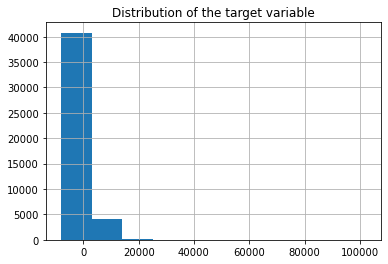

In [11]:
# Visualisation of the target variable

target.hist()
plt.title("Distribution of the target variable");

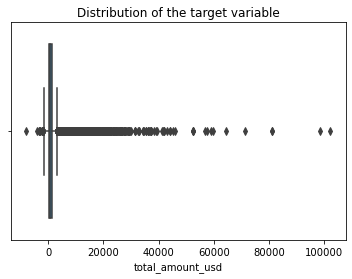

In [12]:
##### Can look at the boxplot of target variable

sns.boxplot(x = target)
plt.title("Distribution of the target variable");

/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


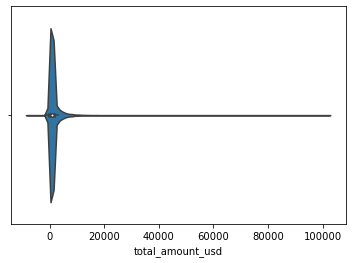

In [13]:
##### violin plot

sns.violinplot(target);

### Split the data into a training and test set

In [14]:
# split into test and training data
# remember it is common to keep 80% for training data and 20% for test data
# 70 - 30 split is also fine

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.2,
                                                random_state = 0)

In [15]:
# print the shape of the training data

print("Training Data")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Training Data
X_train shape: (36143, 24)
y_train shape: (36143,)


In [16]:
# print the shape of the test data 

print("Test Data")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Test Data
X_test shape: (9036, 24)
y_test shape: (9036,)


### Scale the training data
we need to scale the data when working with distant based features

In [17]:
# Scale the data (only X_train)

scaler = StandardScaler()
scaler.fit(X_train)

# transform training data
X_train_scaled = scaler.transform(X_train)

In [18]:
X_train_scaled

array([[ 7.88824774e-03, -1.02698850e+00, -1.34902635e-01, ...,
        -6.03656907e-01, -1.24764757e+00,  2.68421205e+00],
       [ 1.49767907e+00, -3.68471399e-01,  7.41275363e+00, ...,
        -6.03656907e-01,  8.01508393e-01, -3.72548808e-01],
       [-5.88028081e-01,  1.23078443e+00, -1.34902635e-01, ...,
        -6.03656907e-01,  8.01508393e-01, -3.72548808e-01],
       ...,
       [ 1.15649996e-03,  7.82408930e-03, -1.34902635e-01, ...,
        -6.03656907e-01,  8.01508393e-01, -3.72548808e-01],
       [-2.90069917e-01, -3.68471399e-01, -1.34902635e-01, ...,
        -6.03656907e-01,  8.01508393e-01, -3.72548808e-01],
       [-5.88028081e-01,  1.01897961e-01, -1.34902635e-01, ...,
        -6.03656907e-01, -1.24764757e+00,  2.68421205e+00]])

In [19]:
# print the shape of the scaled training data

print("Training Data")
print("Shape of X_train_scaled:", X_train_scaled.shape)

Training Data
Shape of X_train_scaled: (36143, 24)


In [20]:
X_train.head()

,number_transactions,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit,...,education_primary,education_secondary,education_tertiary,contact_cellular,contact_not contacted,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
41705,4.0,30,False,False,False,384,2,-1,0,True,...,0,0,1,1,0,0,0,0,0,1
24259,9.0,37,True,False,False,44,1,123,2,False,...,0,0,1,1,0,0,0,0,1,0
3415,2.0,54,False,True,False,138,2,-1,0,False,...,0,0,0,0,1,0,0,0,1,0
22827,2.0,47,False,True,False,163,8,-1,0,False,...,0,1,0,1,0,0,0,0,1,0
1797,15.0,29,False,True,False,108,2,-1,0,False,...,0,1,0,0,1,0,0,0,1,0


### Import the Logistic Regression model from sklearn and call it lr

In [21]:
# Import the Linear Regression model from sklearn and call it lr

lr = LinearRegression()
lr

LinearRegression()

### Fit the algorithm on the training data

In [22]:
# Fit the model on the "training data"

lr.fit(X_train_scaled, y_train) 

# OUR MACHINE LEARNING MODEL

LinearRegression()

In [23]:
y_test

6317     1196.000000
16336     566.000000
15161    1369.845345
43527    4833.000000
13686       3.000000
            ...     
17263    1369.845345
42253    3417.000000
5388       51.000000
12128     703.000000
4957     1067.000000
Name: total_amount_usd, Length: 9036, dtype: float64

### Evaluate how well the model predicts on unseen data 

In [24]:
# Evaluate how well the model predicts on unseen data aka "test data"

y_pred = lr.predict(X_test) 
y_pred

array([-1.71842927e+15, -1.92103711e+15, -1.91222580e+15, ...,
       -1.74103214e+15, -1.88339046e+15, -1.88447835e+15])

In [25]:
# compare the first five predictions with the actual values

print("first five predicted total amounts:", y_pred[0:5])
print("first five actual total amounts:", list(y_test[0:5]))

first five predicted total amounts: [-1.71842927e+15 -1.92103711e+15 -1.91222580e+15 -2.55532636e+15
 -2.00082110e+15]
first five actual total amounts: [1196.0, 566.0, 1369.8453450039785, 4833.0, 3.0]


# Evaluate model performance

### Use r2 to evaluate the performance of the model

In [26]:
# We will use r2 to evaluate the model performance.
# the evaluation metrics for the model on the test set

r2 = r2_score(y_test, y_pred)
print("R2:", round(r2, 2))

# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

R2: -6.493372991395257e+23


### Use MSE to evaluate the performance of the model

In [27]:
# We will also use MSE to evaluate the model performance.
# the evaluation metrics for the model on the test set

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse, 2))

Mean Squared Error: 3.7463211381821945e+30
